In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [75]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [76]:
train.shape

(614, 13)

In [77]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [80]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [82]:
#Categorical Variables
categorical = train.dtypes[train.dtypes == "object"].index

print(categorical)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [83]:
train[categorical].describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes 

In [84]:
train.groupby(["Gender","Education","Property_Area","Loan_Status"]).size().unstack()
#Not Understood Here

Loan_Status                         N    Y
Gender Education    Property_Area         
Female Graduate     Rural           8   10
                    Semiurban      11   34
                    Urban          12   17
       Not Graduate Rural           2    4
                    Semiurban       2    8
                    Urban           2    2
Male   Graduate     Rural          38   72
                    Semiurban      30  106
                    Urban          37   93
       Not Graduate Rural          19   22
                    Semiurban       9   27
                    Urban          17   19

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9b5032898>]], dtype=object)

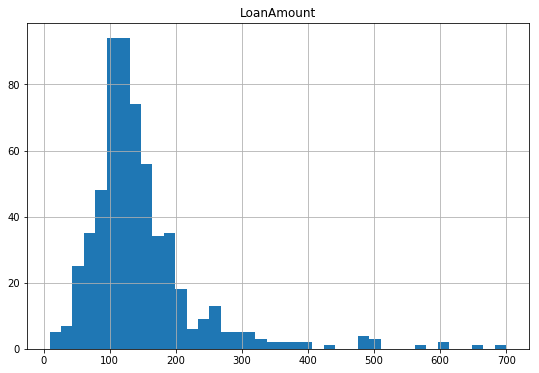

In [85]:
train.hist(column='LoanAmount', figsize=(9,6), bins=40)  

In [86]:
train["Gender"][train["Gender"] == "Male"] = 1
train["Gender"][train["Gender"] == "Female"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
train["Education"][train["Education"] == "Graduate"] = 1
train["Education"][train["Education"] == "Not Graduate"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
train["Married"][train["Married"] == "Yes"] = 1
train["Married"][train["Married"] == "No"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
train["Self_Employed"][train["Self_Employed"] == "Yes"] = 1
train["Self_Employed"][train["Self_Employed"] == "No"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
train["Loan_Status"][train["Loan_Status"] == "Y"] = 1
train["Loan_Status"][train["Loan_Status"] == "N"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
train["Property_Area"][train["Property_Area"] == "Rural"] = 0
train["Property_Area"][train["Property_Area"] == "Semiurban"] = 1
train["Property_Area"][train["Property_Area"] == "Urban"] = 2


/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports u

In [92]:
test["Gender"][test["Gender"] == "Male"] = 1
test["Gender"][test["Gender"] == "Female"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
test["Education"][test["Education"] == "Graduate"] = 1
test["Education"][test["Education"] == "Not Graduate"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
test["Married"][test["Married"] == "Yes"] = 1
test["Married"][test["Married"] == "No"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
test["Self_Employed"][test["Self_Employed"] == "Yes"] = 1
test["Self_Employed"][test["Self_Employed"] == "No"] = 0

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [96]:
test["Property_Area"][test["Property_Area"] == "Rural"] = 0
test["Property_Area"][test["Property_Area"] == "Semiurban"] = 1
test["Property_Area"][test["Property_Area"] == "Urban"] = 2


/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports u

In [97]:
#Removing Missing values from train
train["LoanAmount"]=train["LoanAmount"].fillna(train["LoanAmount"].mean())
train["Gender"]=train["Gender"].fillna(train["Gender"].median())
train["Credit_History"]=train["Credit_History"].fillna(train["Credit_History"].median())
train["Self_Employed"]=train["Self_Employed"].fillna(train["Self_Employed"].median())
train["Loan_Amount_Term"]=train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].median())
train["Married"]=train["Married"].fillna(train["Married"].median())
train["Gender"]=train["Gender"].fillna(train["Gender"].median())

In [98]:
#Removing Missing values from test
test["LoanAmount"]=test["LoanAmount"].fillna(test["LoanAmount"].mean())
test["Gender"]=test["Gender"].fillna(test["Gender"].median())
test["Credit_History"]=test["Credit_History"].fillna(test["Credit_History"].median())
test["Self_Employed"]=test["Self_Employed"].fillna(test["Self_Employed"].median())
test["Loan_Amount_Term"]=test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].median())
test["Married"]=test["Married"].fillna(test["Married"].median())
test["Gender"]=test["Gender"].fillna(test["Gender"].median())

In [99]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [101]:
train["Education"] = train["Education"].astype('float')
train["Loan_Status"] = train["Loan_Status"].astype('float')
test["Education"] = train["Education"].astype('float')

In [102]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression


target = train["Loan_Status"].values
features_one = train[["Gender","Education","LoanAmount","Credit_History"]].values
X_test = test[["Gender","Education","LoanAmount","Credit_History"]].values
                               
logistic_model = LogisticRegression()
logistic_model.fit(features_one, target)

# Print the Models Coefficients
print(logistic_model.coef_)


[[  4.84057763e-02   3.06511908e-01  -1.78817026e-03   3.14245843e+00]]


In [103]:
# Make predictions
preds = logistic_model.predict(X= features_one)
solution = logistic_model.predict(X= X_test)

# Generate table of predictions vs actual
pd.crosstab(preds,train["Loan_Status"])

Loan_Status,0.0,1.0
row_0,,
0.0,82,7
1.0,110,415


In [104]:
# Accuracy

logistic_model.score(X = features_one ,
                y = train["Loan_Status"])

0.80944625407166126

In [105]:
from sklearn import metrics 

# View confusion matrix
metrics.confusion_matrix(y_true=train["Loan_Status"],  # True labels
                         y_pred=preds) # Predicted labels

array([[ 82, 110],
       [  7, 415]])

In [106]:
submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": solution
    })
submission.to_csv('submission.csv', index=False)

In [107]:
sub = pd.read_csv('/home/sanket/Desktop/ML/submission.csv')

In [112]:
sub["Loan_Status"][sub["Loan_Status"] == 1] = 'Y'
sub["Loan_Status"][sub["Loan_Status"] == 0] = 'N'

/home/sanket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
